In [2]:
import os,sys,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from itertools import product
#import pickle5 # Need pickle5 for DataFrame pickles
from scipy.stats import linregress,sem
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mue
import seaborn as sns
from natsort import natsorted as ns
from natsort import *
import matplotlib as mpl
import multiprocessing as mp
cpus = mp.cpu_count()

In [24]:
A8 = pd.read_pickle('../../data/EE/A8_RBFE.pkl')
A13 = pd.read_pickle('../../data/EE/A13_RBFE.pkl').fillna(0)
A18 = pd.read_pickle('../../data/EE/A18_RBFE.pkl')
A8_var = pd.read_pickle('../../data/EE/A8_variance.pkl')
A13_var = pd.read_pickle('../../data/EE/A13_variance.pkl').fillna(0)
A18_var = pd.read_pickle('../../data/EE/A18_variance.pkl')
on = False
if on:
    for col in A8.columns:
        A8[col] = np.mean(A8[col].values+np.random.randn(100000,len(A8[col]))*A8_var[col].values,axis=0)
    for col in A18.columns:
        A18[col] = np.mean(A18[col].values+np.random.randn(100000,len(A18[col]))*A18_var[col].values,axis=0)
    for col in A13.columns:
        A13[col] = np.mean(A13[col].values+np.random.randn(100000,len(A13[col]))*A13_var[col].values,axis=0)

A8_old = pd.read_pickle('../../data/old_EE/A8_RBFE.pkl').fillna(0)
A13_old = pd.read_pickle('../../data/old_EE/A13_RBFE.pkl').fillna(0)
A18_old = pd.read_pickle('../../data/old_EE/A18_RBFE.pkl').fillna(0)
old_A8_var = pd.read_pickle('../../data/old_EE/A8_variance.pkl').fillna(0)
old_A13_var = pd.read_pickle('../../data/old_EE/A13_variance.pkl').fillna(0)
old_A18_var = pd.read_pickle('../../data/old_EE/A18_variance.pkl').fillna(0)

#A8_exp = pd.read_csv('A8_initial_Log10Kd_estimates_20230913.csv')
A8_exp = pd.read_pickle('../../data/Experiment/A8_exp_dg.pkl').reindex(A8.index).fillna(0)
A8_exp_unc = pd.read_pickle('../../data/Experiment/A8_exp_unc.pkl').reindex(A8.index).fillna(0)
A8_ros = pd.read_pickle('../../data/published_rosetta/A8_rosetta_data.pkl')
A8_seq = open('../../data/sequences/A8_sequence.afasta').readlines()[0].replace('\n','')
#A8_exp=transform_exp(A8_exp,A8_seq)
A8_seq =[f'{A8_seq[i]}{270+i}' for i in range(len(A8_seq))]


#A18_exp = pd.read_csv('A18_initial_Log10Kd_estimates_20230913.csv')
A18_exp = pd.read_pickle('../../data/Experiment/A18_exp_dg.pkl').reindex(A18.index).fillna(0)
A18_exp_unc = pd.read_pickle('../../data/Experiment/A18_exp_unc.pkl').reindex(A18.index).fillna(0)
A18_ros = pd.read_pickle('../../data/published_rosetta/A18_rosetta_data.pkl')
A18_seq = open('../../data/sequences/A18_sequence.afasta').readlines()[0].replace('\n','')
#A18_exp=transform_exp(A18_exp,A18_seq)
A18_seq=[f'{A18_seq[i]}{270+i}' for i in range(len(A18_seq))]


#A13_exp = pd.read_csv('A13_initial_Log10Kd_estimates_20230913.csv')
A13_exp = pd.read_pickle('../../data/Experiment/A13_exp_dg.pkl').reindex(A13.index).fillna(0)
A13_exp_unc = pd.read_pickle('../../data/Experiment/A13_exp_unc.pkl').reindex(A13.index).fillna(0)
A13_ros = pd.read_pickle('../../data/published_rosetta/A13_rosetta_data.pkl')
A13_seq = open('../../data/sequences/A13_sequence.afasta').readlines()[0].replace('\n','')
#A13_exp=transform_exp(A13_exp,A13_seq)
A13_seq =[f'{A13_seq[i]}{270+i}' for i in range(len(A13_seq))]

# Fix Rosetta A8 Df
A8_ros['Index']=A8_ros['Index'].astype('int')+ 270
A8_ros['Wild'] = A8_ros['Wild']+A8_ros['Index'].astype('str')
A8_ros.drop(columns='Index',inplace=True)
A8_ros = A8_ros.pivot(columns='Wild',index = 'Mut')
A8_ros.rename_axis(None,inplace=True)
A8_ros.rename_axis([None,None],axis=1,inplace=True)
A8_ros.columns = np.vstack(A8_ros.columns)[:,1]
mylist = list(A8_ros.columns)
numbers = [i[1:] for i in mylist]
indices = np.array(index_natsorted(numbers))
A8_ros = A8_ros[A8_ros.columns[indices]]
test = np.concatenate([np.argwhere(i == A8_ros.index) for i in A8.index]).flatten()
A8_ros = A8_ros.reindex(A8_ros.index[test])
A8_ros = A8_ros.astype('float')
A8_ros=A8_ros.fillna(0)

# Fix Rosetta A13 Df
A13_ros['Index']=A13_ros['Index'].astype('int')+ 270
A13_ros['Wild'] = A13_ros['Wild']+A13_ros['Index'].astype('str')
A13_ros.drop(columns='Index',inplace=True)
A13_ros = A13_ros.pivot(columns='Wild',index = 'Mut')
A13_ros.rename_axis(None,inplace=True)
A13_ros.rename_axis([None,None],axis=1,inplace=True)
A13_ros.columns = np.vstack(A13_ros.columns)[:,1]
mylist = list(A13_ros.columns)
numbers = [i[1:] for i in mylist]
indices = np.array(index_natsorted(numbers))
A13_ros = A13_ros[A13_ros.columns[indices]]
test = np.concatenate([np.argwhere(i == A13_ros.index) for i in A13.index]).flatten()
A13_ros = A13_ros.reindex(A13_ros.index[test])
A13_ros = A13_ros.astype('float')
A13_ros=A13_ros.fillna(0)

# Fix Rosetta A18 Df
A18_ros['Index']=A18_ros['Index'].astype('int')+ 270
A18_ros['Wild'] = A18_ros['Wild']+A18_ros['Index'].astype('str')
A18_ros.drop(columns='Index',inplace=True)
A18_ros = A18_ros.pivot(columns='Wild',index = 'Mut')
A18_ros.rename_axis(None,inplace=True)
A18_ros.rename_axis([None,None],axis=1,inplace=True)
A18_ros.columns = np.vstack(A18_ros.columns)[:,1]
mylist = list(A18_ros.columns)
numbers = [i[1:] for i in mylist]
indices = np.array(index_natsorted(numbers))
A18_ros = A18_ros[A18_ros.columns[indices]]
test = np.concatenate([np.argwhere(i == A18_ros.index) for i in A18.index]).flatten()
A18_ros = A18_ros.reindex(A18_ros.index[test])
A18_ros = A18_ros.astype('float')
A18_ros=A18_ros.fillna(0)

A8_old_ros =  A8_ros * 1/1.84
A13_old_ros = A13_ros * 1/1.84
A18_old_ros = A18_ros * 1/1.84

A8_curr_ros = pd.read_csv('A8_current_rosetta.csv')
A13_curr_ros = pd.read_csv('A13_current_rosetta.csv')
A18_curr_ros = pd.read_csv('A18_current_rosetta.csv')

def make_df(output,temp):
    output = output[output['state']=='ddg']
    for index,row in output.iterrows():
        col = row['position_label']
        mut = row['mutation'][-1]
        val = row['total_score']
        temp[col][mut]=val
    return temp
A8_curr_ros = make_df(A8_curr_ros,A8_old_ros.copy())
A13_curr_ros = make_df(A13_curr_ros,A13_old_ros.copy())
A18_curr_ros = make_df(A18_curr_ros,A18_old_ros.copy())

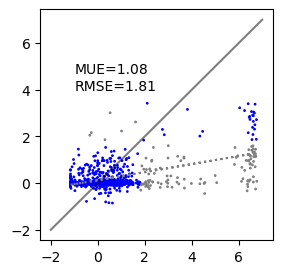

In [40]:
def make_scatter(x,y,ax=None,cutoff=1.8,ros=False):
    l1 = linregress(x,y)
    MUE_fep = np.around(mue(x,l1.slope*x+l1.intercept),2)
    RMSE_fep = np.around(np.sqrt(mse(x,l1.slope*x+l1.intercept)),2)
    label = f'MUE={MUE_fep}\nRMSE={RMSE_fep}'
    c = []
    for i,j in enumerate(x):
        if (j<-cutoff) and (y[i]<-cutoff):
            c.append('b')
        elif (j>cutoff) and (y[i]>cutoff):
            c.append('b')
        elif (j>-cutoff) and (j<cutoff) and (y[i]>-cutoff) and (y[i]<cutoff):
            c.append('b')
        else:
            c.append('grey')
    ax.scatter(x,y,s=1,color=c)
    ax.plot(np.arange(-2,8),np.arange(-2,8),c='k',alpha=0.5)
    ax.plot(x,l1.slope*x+l1.intercept,linestyle=":",c='gray')
    if ros:
        ax.text(-1,3,label)
    else:
        ax.text(-1,4,label)
fig,ax=plt.subplots(figsize=(3,3))
x,y = np.concatenate(A8_exp[A8.columns].values),np.concatenate(A8_curr_ros[A8.columns].values)
make_scatter(x,y,ax=ax)

[Text(0.5, 1, 'T270'),
 Text(2.5, 1, 'R272'),
 Text(4.5, 1, 'R274'),
 Text(6.5, 1, 'T276'),
 Text(8.5, 1, 'K278'),
 Text(10.5, 1, 'A280'),
 Text(12.5, 1, 'L282'),
 Text(14.5, 1, 'A284'),
 Text(16.5, 1, 'E286'),
 Text(18.5, 1, 'A288'),
 Text(20.5, 1, 'E290'),
 Text(22.5, 1, 'G292'),
 Text(24.5, 1, 'T294'),
 Text(26.5, 1, 'D296'),
 Text(28.5, 1, 'Q298'),
 Text(30.5, 1, 'V300'),
 Text(32.5, 1, 'G302'),
 Text(34.5, 1, 'W304'),
 Text(36.5, 1, 'V306'),
 Text(38.5, 1, 'F308')]

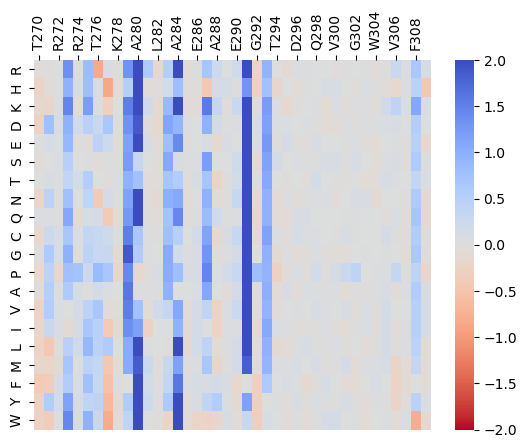

In [31]:
fig,ax = plt.subplots()
sns.heatmap(A8_curr_ros, cmap="coolwarm_r",ax=ax,vmin=-2,vmax=2)
ax.xaxis.set_ticks_position('top')
        #ax.set_title(key+' '+t,fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [23]:
temp

,T270,S271,R272,V273,R274,A275,T276,S277,K278,F279,...,V300,N301,G302,Q303,W304,E305,V306,T307,F308,D309
R,-0.04833,-0.02811,0.00000,1.35191,-0.01069,0.83799,-0.84204,0.07153,-0.02361,1.33493,...,-0.05064,-0.00186,0.00271,-0.00568,-0.05181,-0.00890,0.26743,0.05145,0.64067,0.08248
H,-0.25020,-0.03723,-0.00462,0.95763,0.10741,0.81106,0.08480,-0.85389,-0.08927,0.52253,...,0.09322,0.00557,-0.03941,0.05305,-0.00919,-0.05448,-0.14417,0.02226,0.45636,-0.46064
K,-0.15585,-0.17594,-0.00394,1.45796,-0.03408,1.20353,0.02011,-0.32376,0.00000,1.52817,...,0.03463,-0.05482,0.04093,-0.00763,-0.04172,0.17418,0.41482,0.05497,1.08006,0.05985
D,-0.27479,0.77338,0.06356,0.96364,0.18751,0.47354,0.27840,0.65135,-0.02919,1.33476,...,-0.07618,0.01951,-0.01624,0.02636,0.01931,0.05528,0.07146,0.01064,0.53952,0.00000
E,0.01288,0.10797,0.05082,0.88684,-0.01451,-0.06035,0.42617,0.22891,-0.07355,1.15749,...,0.00492,-0.01025,0.05492,-0.03549,-0.08027,0.00000,0.02962,-0.01750,0.48129,-0.14803
S,-0.04460,0.00000,0.05766,0.50433,0.01130,0.01832,-0.05041,-0.00688,-0.02061,1.22478,...,0.09101,-0.00598,0.08845,0.01461,-0.08627,0.04545,0.06584,-0.04494,0.60865,-0.01163
T,0.00000,0.09219,0.03739,0.37156,0.14620,0.54638,0.00000,-0.04127,0.05309,0.95476,...,-0.00299,-0.01582,0.00397,-0.08872,-0.05910,0.09718,0.03429,0.00000,0.35807,0.05427
N,-0.19252,0.42250,-0.00941,0.76838,0.01148,0.39099,-0.41824,0.13404,-0.00628,1.14156,...,-0.05638,0.00000,0.07499,0.06655,-0.10174,0.00966,0.01337,-0.02779,0.59939,-0.12096
Q,0.03218,0.02194,-0.02935,1.09014,-0.10732,0.09632,0.13094,-0.41040,-0.09137,1.26031,...,0.00231,-0.01118,0.01674,0.00000,0.00498,-0.02527,0.05860,-0.05541,0.69939,-0.14349
C,-0.14811,0.24744,0.10495,0.66638,0.04719,0.35171,0.29756,0.23363,-0.01164,1.52642,...,-0.01229,0.07870,-0.01458,0.00913,0.01528,0.13808,-0.00395,-0.05215,0.55187,-0.02728
